In [61]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd

# Carregar os CSVs com codificação 'latin1' e separador ';'
df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")

# Realizar merge com base na coluna 'Data'
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

# Exibir as primeiras linhas do DataFrame final
print(dados.head())

# (Opcional) Salvar o resultado em um novo CSV
dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")


#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())
# dados não repetidos
print(dados.nunique())

#aparentemente tudo certo :)
print(dados)

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

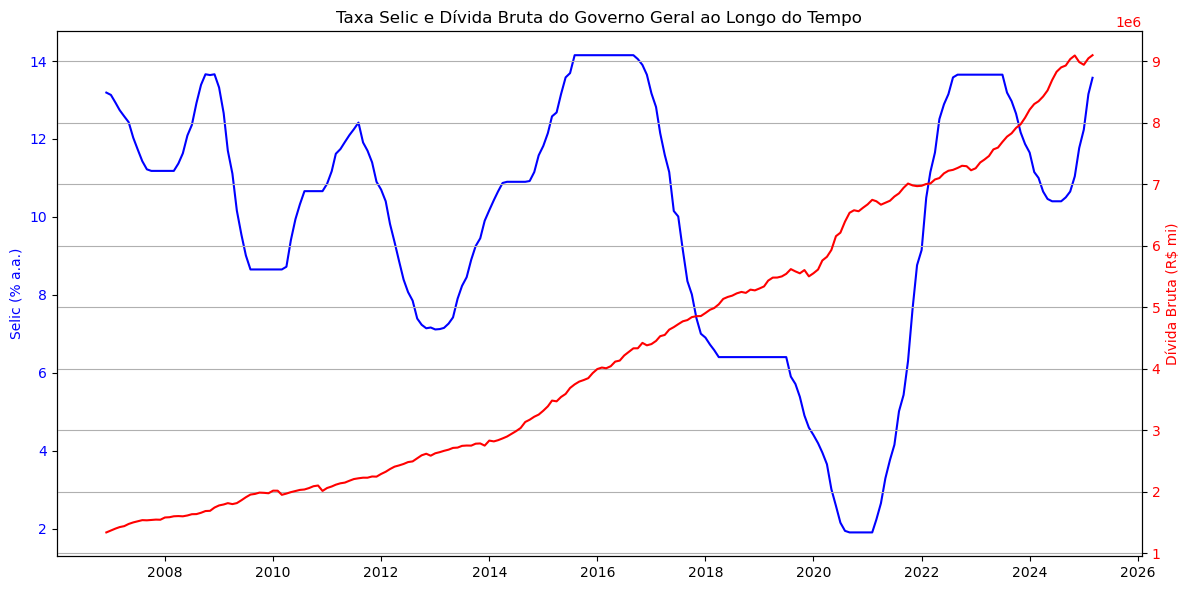

In [63]:
import matplotlib.pyplot as plt


dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

# Substituir vírgula por ponto e converter colunas numéricas
dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo Y da esquerda (Selic)
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo Y da direita (Dívida)
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título e layout
plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
plt.grid(True)
fig.tight_layout()
plt.show()